In [123]:
#!pip install pandas_profiling
#!pip install missingno

In [124]:
import warnings 
warnings.filterwarnings('ignore')

In [125]:
#Importing Libraries
import pandas as pd
import numpy as np
import csv

import sys
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas_profiling
%matplotlib inline

In [126]:
print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__ )
print('Missingno version ' + msno.__version__)

Python version 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
Numpy version 1.14.5
Pandas version 0.23.3
Matplotlib version 2.1.2
Missingno version 0.4.1


In [105]:
#Assigning data files to pandas dataframe
rock = pd.read_csv('data/Raw-Data/rock_n_rollercoaster.csv')

In [106]:
#Preview dataset
rock.head(5)

date  SPOSTMIN  SACTMIN
0  1/1/2015       5.0      NaN
1  1/1/2015       5.0      NaN
2  1/1/2015      20.0      NaN
3  1/1/2015      20.0      NaN
4  1/1/2015      20.0      NaN

In [107]:
rock.shape

(151389, 3)

In [108]:
rock.iloc[0]

date        1/1/2015
SPOSTMIN           5
SACTMIN          NaN
Name: 0, dtype: object

In [109]:
rock.head(5)

date  SPOSTMIN  SACTMIN
0  1/1/2015       5.0      NaN
1  1/1/2015       5.0      NaN
2  1/1/2015      20.0      NaN
3  1/1/2015      20.0      NaN
4  1/1/2015      20.0      NaN

In [110]:
#Find Average for Line Wait times
rock['date'] = pd.to_datetime(rock['date'])
predict = rock.resample('D', on='date')['SPOSTMIN'].mean().reset_index()
actual = rock.resample('D', on='date')['SACTMIN'].mean().reset_index()


In [111]:
predict.columns = ['Date','Predicted Line Time']
predict.head(5)

Date  Predicted Line Time
0 2015-01-01            74.717742
1 2015-01-02            80.080645
2 2015-01-03            88.222222
3 2015-01-04             5.000000
4 2015-01-05            62.321429

In [112]:
actual.columns = ['Date','Actual Line Time']
actual.head(5)

Date  Actual Line Time
0 2015-01-01              41.2
1 2015-01-02              26.0
2 2015-01-03              30.0
3 2015-01-04               NaN
4 2015-01-05              21.0

In [113]:
#output to csv
predict.to_csv(r'data/PredictRockNRoll.csv', encoding = 'utf-8', index = False)
actual.to_csv(r'data/ActualRockNRoll.csv', encoding = 'utf-8', index = False)

In [114]:
# First we will join the metadata with the CSVs we just created above (Predicted & actual times)
meta = pd.read_csv('data/Raw-Data/metadata.csv')
meta

DATE WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
0      1/1/2015               NaN          5          0           0   
1      1/2/2015               NaN          6          1           0   
2      1/3/2015               NaN          7          2           0   
3      1/4/2015               NaN          1          3           1   
4      1/5/2015               NaN          2          4           1   
5      1/6/2015               NaN          3          5           1   
6      1/7/2015               NaN          4          6           1   
7      1/8/2015               NaN          5          7           1   
8      1/9/2015               NaN          6          8           1   
9     1/10/2015               NaN          7          9           1   
10    1/11/2015               NaN          1         10           2   
11    1/12/2015               NaN          2         11           2   
12    1/13/2015               NaN          3         12           2   
13    1/14/2015               NaN          4         13           2   
14    1/15/2015               NaN          5         14           2   
15    1/16/2015               NaN          6         15           2   
16    1/17/2015               NaN          7         16           2   
17    1/18/2015               NaN          1         17           3   
18    1/19/2015               NaN          2         18           3   
19    1/20/2015               NaN          3         19           3   
20    1/21/2015               NaN          4         20           3   
21    1/22/2015               NaN          5         21           3   
22    1/23/2015               NaN          6         22           3   
23    1/24/2015               NaN          7         23           3   
24    1/25/2015               NaN          1         24           4   
25    1/26/2015               NaN          2         25           4   
26    1/27/2015               NaN          3         26           4   
27    1/28/2015               NaN          4         27           4   
28    1/29/2015               NaN          5         28           4   
29    1/30/2015               NaN          6         29           4   
...         ...               ...        ...        ...         ...   
1275   7/1/2018              peak          1        181          26   
1276   7/2/2018              peak          2        182          26   
1277   7/3/2018              peak          3        183          26   
1278   7/4/2018              peak          4        184          26   
1279   7/5/2018           regular          5        185          26   
1280   7/6/2018           regular          6        186          26   
1281   7/7/2018           regular          7        187          26   
1282   7/8/2018           regular          1        188          27   
1283   7/9/2018           regular          2        189          27   
1284  7/10/2018           regular          3        190          27   
1285  7/11/2018           regular          4        191          27   
1286  7/12/2018           regular          5        192          27   
1287  7/13/2018           regular          6        193          27   
1288  7/14/2018           regular          7        194          27   
1289  7/15/2018           regular          1        195          28   
1290  7/16/2018           regular          2        196          28   
1291  7/17/2018           regular          3        197          28   
1292  7/18/2018           regular          4        198          28   
1293  7/19/2018           regular          5        199          28   
1294  7/20/2018           regular          6        200          28   
1295  7/21/2018           regular          7        201          28   
1296  7/22/2018           regular          1        202          29   
1297  7/23/2018           regular          2        203          29   
1298  7/24/2018           regular          3        204          29   
1299  7/25/2018           regular  

In [117]:
#Create Predicted DF with metadata
predictmerge = pd.merge(predict,meta, how = 'inner',left_index=True,right_index=True)
cleanpredict = predictmerge.drop(['DATE'],axis=1)
cleanpredict

Date  Predicted Line Time WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  \
0    2015-01-01            74.717742               NaN          5          0   
1    2015-01-02            80.080645               NaN          6          1   
2    2015-01-03            88.222222               NaN          7          2   
3    2015-01-04             5.000000               NaN          1          3   
4    2015-01-05            62.321429               NaN          2          4   
5    2015-01-06            61.428571               NaN          3          5   
6    2015-01-07            64.666667               NaN          4          6   
7    2015-01-08            55.101010               NaN          5          7   
8    2015-01-09            60.476190               NaN          6          8   
9    2015-01-10            54.087591               NaN          7          9   
10   2015-01-11            37.462687               NaN          1         10   
11   2015-01-12            45.527950               NaN          2         11   
12   2015-01-13            40.261194               NaN          3         12   
13   2015-01-14            35.196850               NaN          4         13   
14   2015-01-15            33.063063               NaN          5         14   
15   2015-01-16            42.727273               NaN          6         15   
16   2015-01-17            86.032258               NaN          7         16   
17   2015-01-18            70.076923               NaN          1         17   
18   2015-01-19            67.980132               NaN          2         18   
19   2015-01-20            75.986842               NaN          3         19   
20   2015-01-21            45.071942               NaN          4         20   
21   2015-01-22            47.560000               NaN          5         21   
22   2015-01-23            42.642276               NaN          6         22   
23   2015-01-24            47.913669               NaN          7         23   
24   2015-01-25            57.250000               NaN          1         24   
25   2015-01-26            34.909091               NaN          2         25   
26   2015-01-27            49.160584               NaN          3         26   
27   2015-01-28            54.545455               NaN          4         27   
28   2015-01-29            39.078947               NaN          5         28   
29   2015-01-30            65.590551               NaN          6         29   
...         ...                  ...               ...        ...        ...   
1275 2018-06-29            64.375000              peak          1        181   
1276 2018-06-30            85.359712              peak          2        182   
1277 2018-07-01            61.472603              peak          3        183   
1278 2018-07-02            74.522059              peak          4        184   
1279 2018-07-03            72.200000           regular          5        185   
1280 2018-07-04            55.325203           regular          6        186   
1281 2018-07-05            69.137931           regular          7        187   
1282 2018-07-06            61.353383           regular          1        188   
1283 2018-07-07            41.423841           regular          2        189   
1284 2018-07-08            47.655172           regular          3        190   
1285 2018-07-09            51.818182           regular          4        191   
1286 2018-07-10            55.206897           regular          5        192   
1287 2018-07-11            47.123288           regular          6        193   
1288 2018-07-12            51.487603           regular          7        194   
1289 2018-07-13            74.233333           regular          1        195   
1290 2018-07-14            43.308271           regular          2        196   
1291 2018-07-15            40.369128           regular          3        197   
1292 2018-07-16            46.360544           regular          4        198   
1293 2018-0

In [118]:
#Create Predicted DF with metadata
actualmerge = pd.merge(actual,meta, how = 'inner',left_index=True,right_index=True)
cleanactual = actualmerge.drop(['DATE'],axis=1)
cleanactual

Date  Actual Line Time WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  \
0    2015-01-01         41.200000               NaN          5          0   
1    2015-01-02         26.000000               NaN          6          1   
2    2015-01-03         30.000000               NaN          7          2   
3    2015-01-04               NaN               NaN          1          3   
4    2015-01-05         21.000000               NaN          2          4   
5    2015-01-06         11.000000               NaN          3          5   
6    2015-01-07         36.000000               NaN          4          6   
7    2015-01-08         29.666667               NaN          5          7   
8    2015-01-09         42.000000               NaN          6          8   
9    2015-01-10         40.333333               NaN          7          9   
10   2015-01-11         11.400000               NaN          1         10   
11   2015-01-12         18.333333               NaN          2         11   
12   2015-01-13         34.250000               NaN          3         12   
13   2015-01-14               NaN               NaN          4         13   
14   2015-01-15         34.000000               NaN          5         14   
15   2015-01-16         28.666667               NaN          6         15   
16   2015-01-17         20.500000               NaN          7         16   
17   2015-01-18         47.000000               NaN          1         17   
18   2015-01-19         26.333333               NaN          2         18   
19   2015-01-20         72.000000               NaN          3         19   
20   2015-01-21               NaN               NaN          4         20   
21   2015-01-22         32.750000               NaN          5         21   
22   2015-01-23         29.666667               NaN          6         22   
23   2015-01-24          6.000000               NaN          7         23   
24   2015-01-25         13.666667               NaN          1         24   
25   2015-01-26         20.100000               NaN          2         25   
26   2015-01-27         12.000000               NaN          3         26   
27   2015-01-28         16.000000               NaN          4         27   
28   2015-01-29               NaN               NaN          5         28   
29   2015-01-30         64.000000               NaN          6         29   
...         ...               ...               ...        ...        ...   
1275 2018-06-29         22.000000              peak          1        181   
1276 2018-06-30          8.500000              peak          2        182   
1277 2018-07-01         21.000000              peak          3        183   
1278 2018-07-02         80.000000              peak          4        184   
1279 2018-07-03         76.333333           regular          5        185   
1280 2018-07-04         62.000000           regular          6        186   
1281 2018-07-05         35.000000           regular          7        187   
1282 2018-07-06         21.250000           regular          1        188   
1283 2018-07-07         25.000000           regular          2        189   
1284 2018-07-08               NaN           regular          3        190   
1285 2018-07-09               NaN           regular          4        191   
1286 2018-07-10         47.500000           regular          5        192   
1287 2018-07-11         20.333333           regular          6        193   
1288 2018-07-12          7.000000           regular          7        194   
1289 2018-07-13         13.000000           regular          1        195   
1290 2018-07-14               NaN           regular          2        196   
1291 2018-07-15         13.333333           regular          3        197   
1292 2018-07-16         30.000000           regular          4        198   
1293 2018-07-17         13.000000           regular          5        199   
1294 2018-07-18         41.333333           regular          6        200   
1295 20

In [127]:
######THIS STEP IS NOW LOOKING AT MISSING DATA IN META DATA######

In [131]:
cleanpredict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305 entries, 0 to 1304
Columns: 191 entries, Date to AKSHWNN
dtypes: datetime64[ns](1), float64(38), int64(62), object(90)
memory usage: 1.9+ MB


In [135]:
cleanpredict.isnull().sum()

Date                      0
Predicted Line Time      19
WDW_TICKET_SEASON       423
DAYOFWEEK                 0
DAYOFYEAR                 0
WEEKOFYEAR                0
MONTHOFYEAR               0
YEAR                      0
SEASON                    0
HOLIDAYPX                 0
HOLIDAYM                  0
HOLIDAYN               1172
HOLIDAY                   0
WDWTICKETSEASON         423
WDWRaceN               1247
WDWeventN              1243
WDWevent                  0
WDWrace                   0
WDWSEASON                 0
WDWMAXTEMP                5
WDWMINTEMP                6
WDWMEANTEMP               6
MKeventN               1046
MKevent                   0
EPeventN                667
EPevent                   0
HSeventN               1237
HSevent                   0
AKeventN               1291
AKevent                   0
                       ... 
MKPRDNN                 653
MKFIREWK                  0
MKFIRET1                  9
MKFIRET2               1299
MKFIREN             

In [136]:
cleanpredict.notnull().sum()

Date                   1305
Predicted Line Time    1286
WDW_TICKET_SEASON       882
DAYOFWEEK              1305
DAYOFYEAR              1305
WEEKOFYEAR             1305
MONTHOFYEAR            1305
YEAR                   1305
SEASON                 1305
HOLIDAYPX              1305
HOLIDAYM               1305
HOLIDAYN                133
HOLIDAY                1305
WDWTICKETSEASON         882
WDWRaceN                 58
WDWeventN                62
WDWevent               1305
WDWrace                1305
WDWSEASON              1305
WDWMAXTEMP             1300
WDWMINTEMP             1299
WDWMEANTEMP            1299
MKeventN                259
MKevent                1305
EPeventN                638
EPevent                1305
HSeventN                 68
HSevent                1305
AKeventN                 14
AKevent                1305
                       ... 
MKPRDNN                 652
MKFIREWK               1305
MKFIRET1               1296
MKFIRET2                  6
MKFIREN             

In [132]:
cleanactual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305 entries, 0 to 1304
Columns: 191 entries, Date to AKSHWNN
dtypes: datetime64[ns](1), float64(38), int64(62), object(90)
memory usage: 1.9+ MB


In [137]:
cleanactual.isnull().sum()

Date                    0
Actual Line Time      245
WDW_TICKET_SEASON     423
DAYOFWEEK               0
DAYOFYEAR               0
WEEKOFYEAR              0
MONTHOFYEAR             0
YEAR                    0
SEASON                  0
HOLIDAYPX               0
HOLIDAYM                0
HOLIDAYN             1172
HOLIDAY                 0
WDWTICKETSEASON       423
WDWRaceN             1247
WDWeventN            1243
WDWevent                0
WDWrace                 0
WDWSEASON               0
WDWMAXTEMP              5
WDWMINTEMP              6
WDWMEANTEMP             6
MKeventN             1046
MKevent                 0
EPeventN              667
EPevent                 0
HSeventN             1237
HSevent                 0
AKeventN             1291
AKevent                 0
                     ... 
MKPRDNN               653
MKFIREWK                0
MKFIRET1                9
MKFIRET2             1299
MKFIREN                 9
EPFIREWK                0
EPFIRET1                3
EPFIRET2    

In [138]:
cleanactual.notnull().sum()

Date                 1305
Actual Line Time     1060
WDW_TICKET_SEASON     882
DAYOFWEEK            1305
DAYOFYEAR            1305
WEEKOFYEAR           1305
MONTHOFYEAR          1305
YEAR                 1305
SEASON               1305
HOLIDAYPX            1305
HOLIDAYM             1305
HOLIDAYN              133
HOLIDAY              1305
WDWTICKETSEASON       882
WDWRaceN               58
WDWeventN              62
WDWevent             1305
WDWrace              1305
WDWSEASON            1305
WDWMAXTEMP           1300
WDWMINTEMP           1299
WDWMEANTEMP          1299
MKeventN              259
MKevent              1305
EPeventN              638
EPevent              1305
HSeventN               68
HSevent              1305
AKeventN               14
AKevent              1305
                     ... 
MKPRDNN               652
MKFIREWK             1305
MKFIRET1             1296
MKFIRET2                6
MKFIREN              1296
EPFIREWK             1305
EPFIRET1             1302
EPFIRET2    

In [133]:
pandas_profiling.ProfileReport(cleanpredict)

In [134]:
pandas_profiling.ProfileReport(cleanactual)

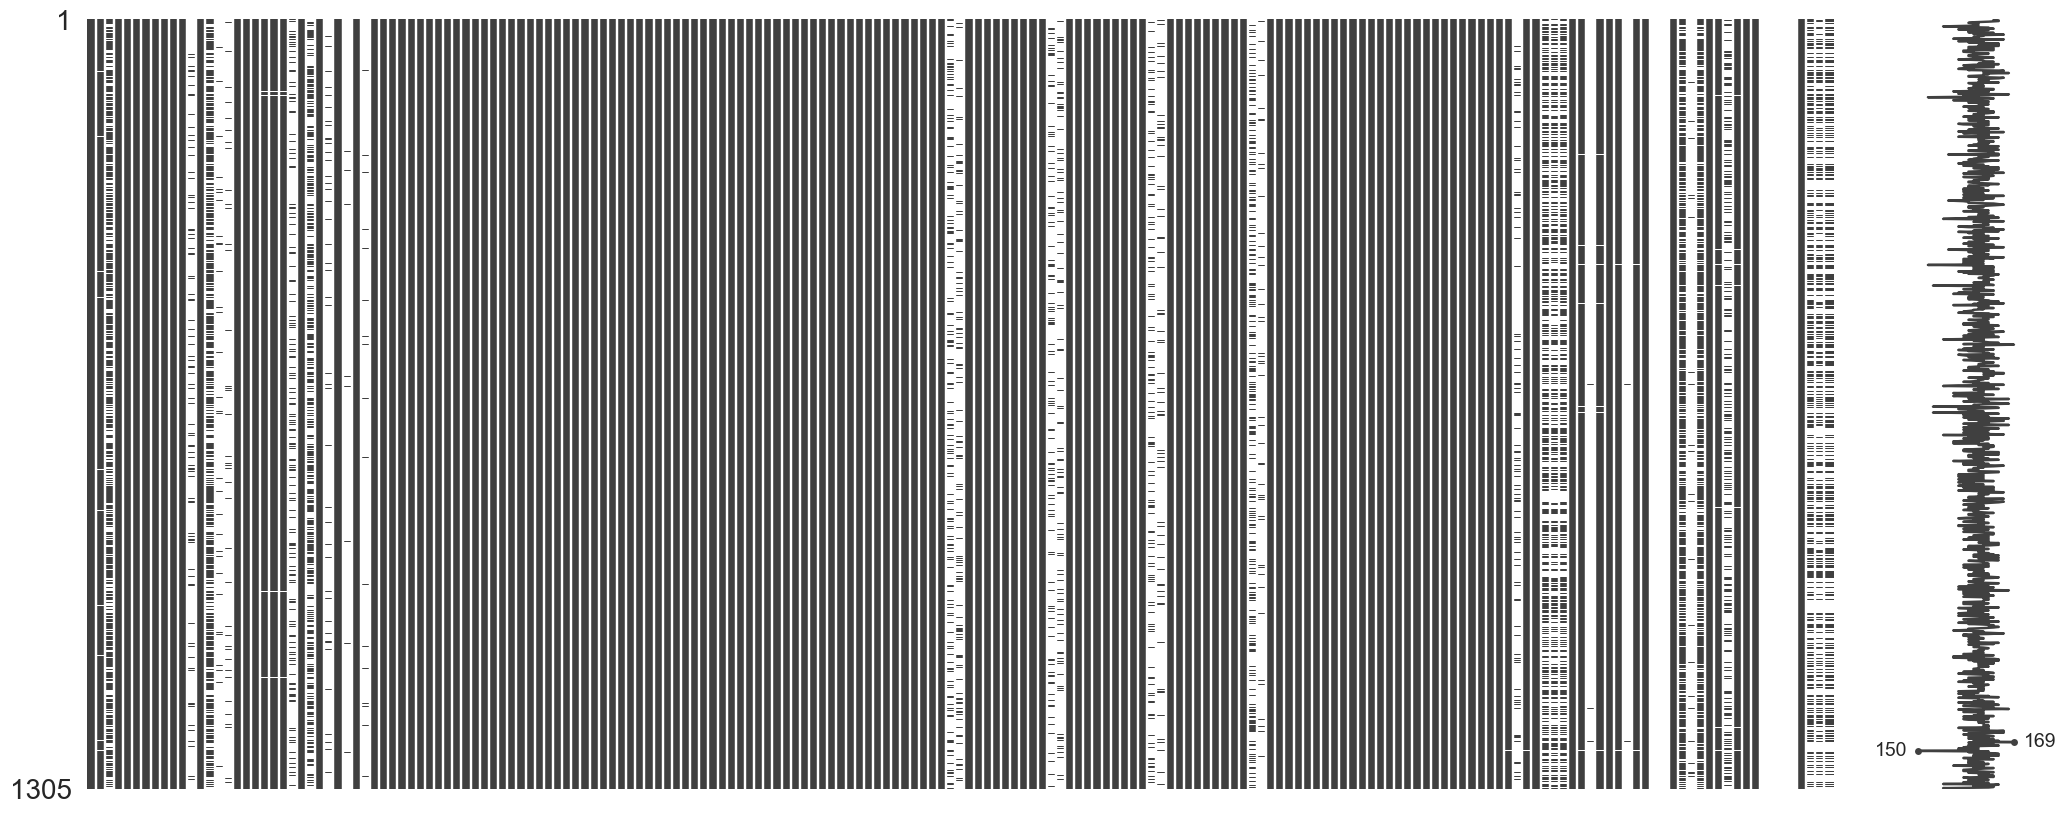

In [139]:
msno.matrix(cleanpredict.sample(1305))

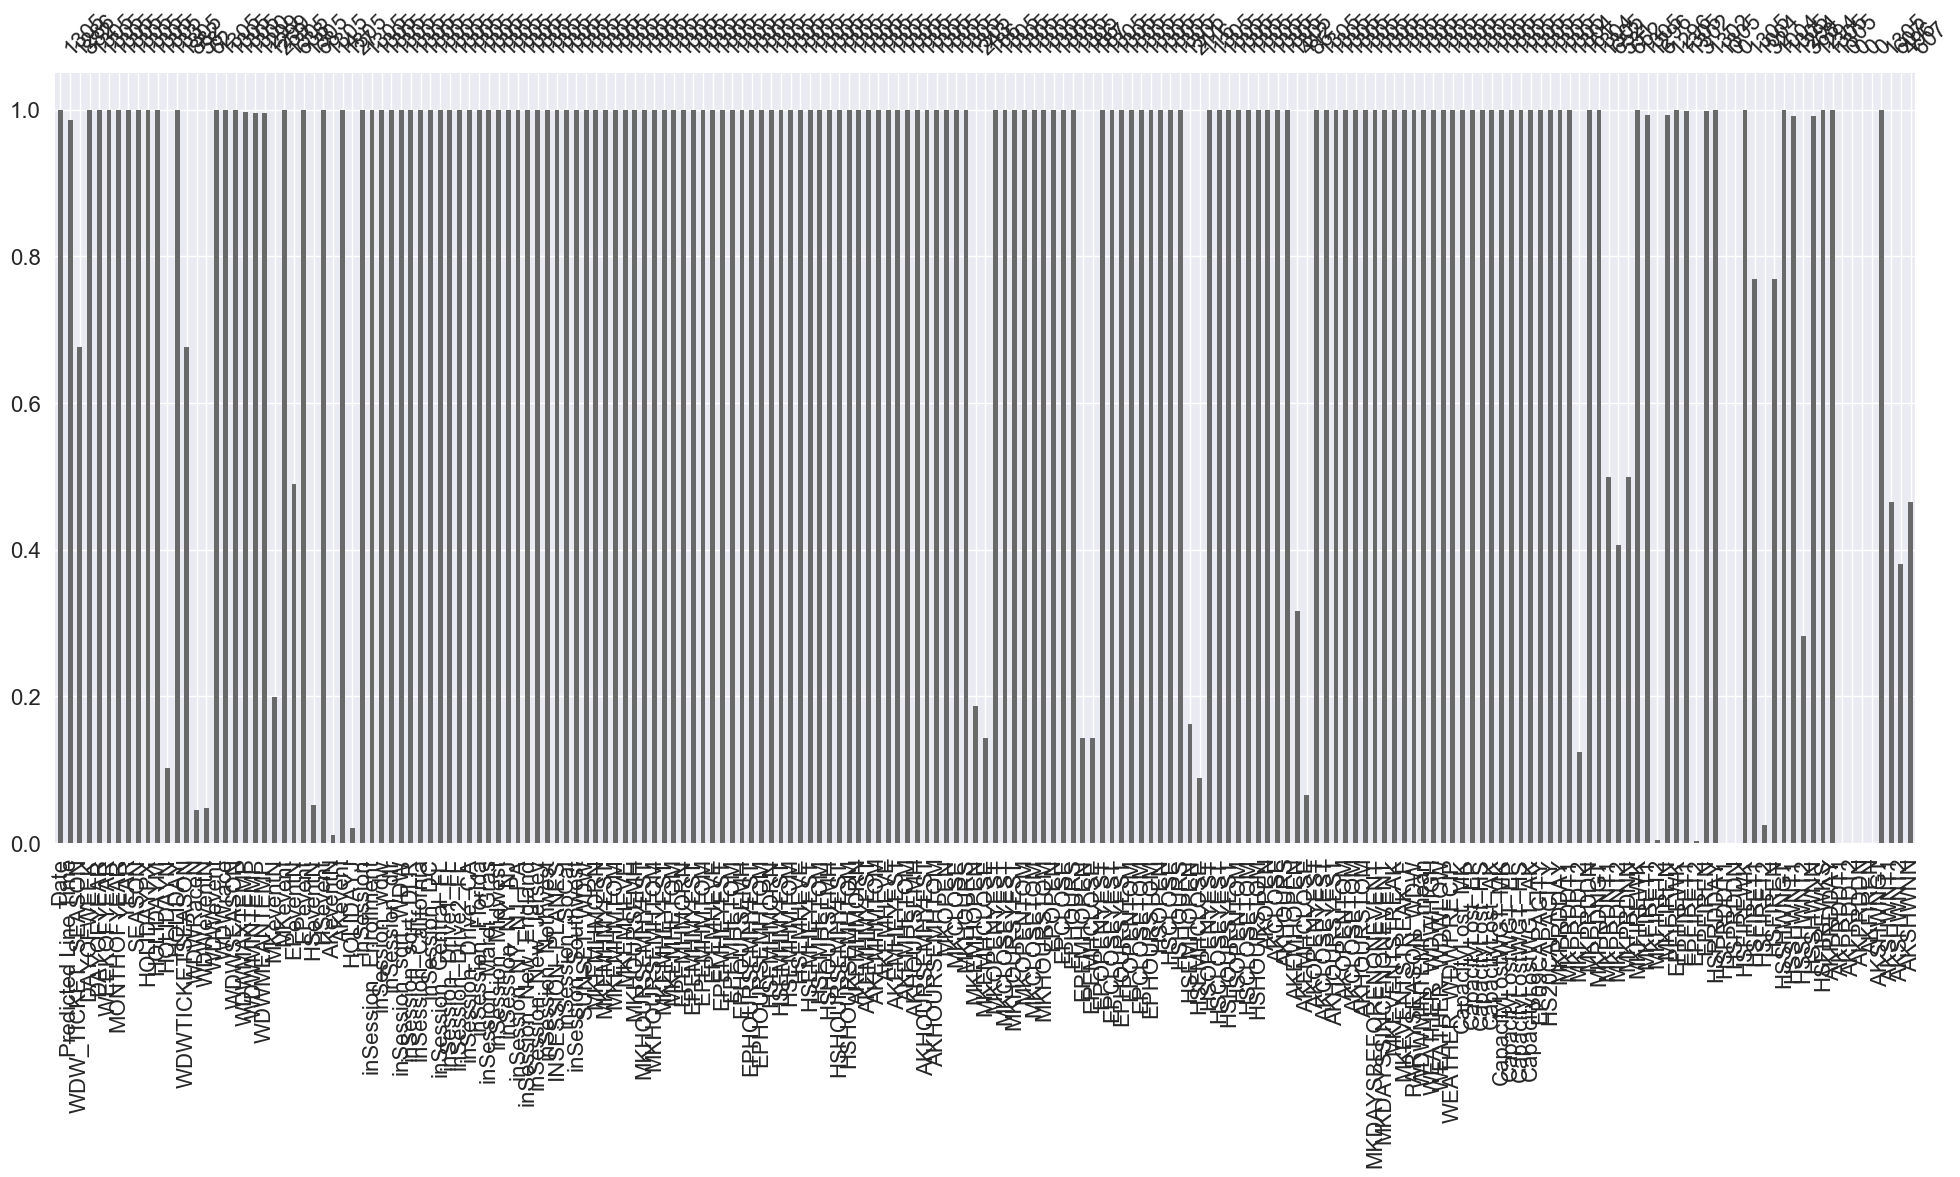

In [140]:
msno.bar(cleanpredict.sample(1305))

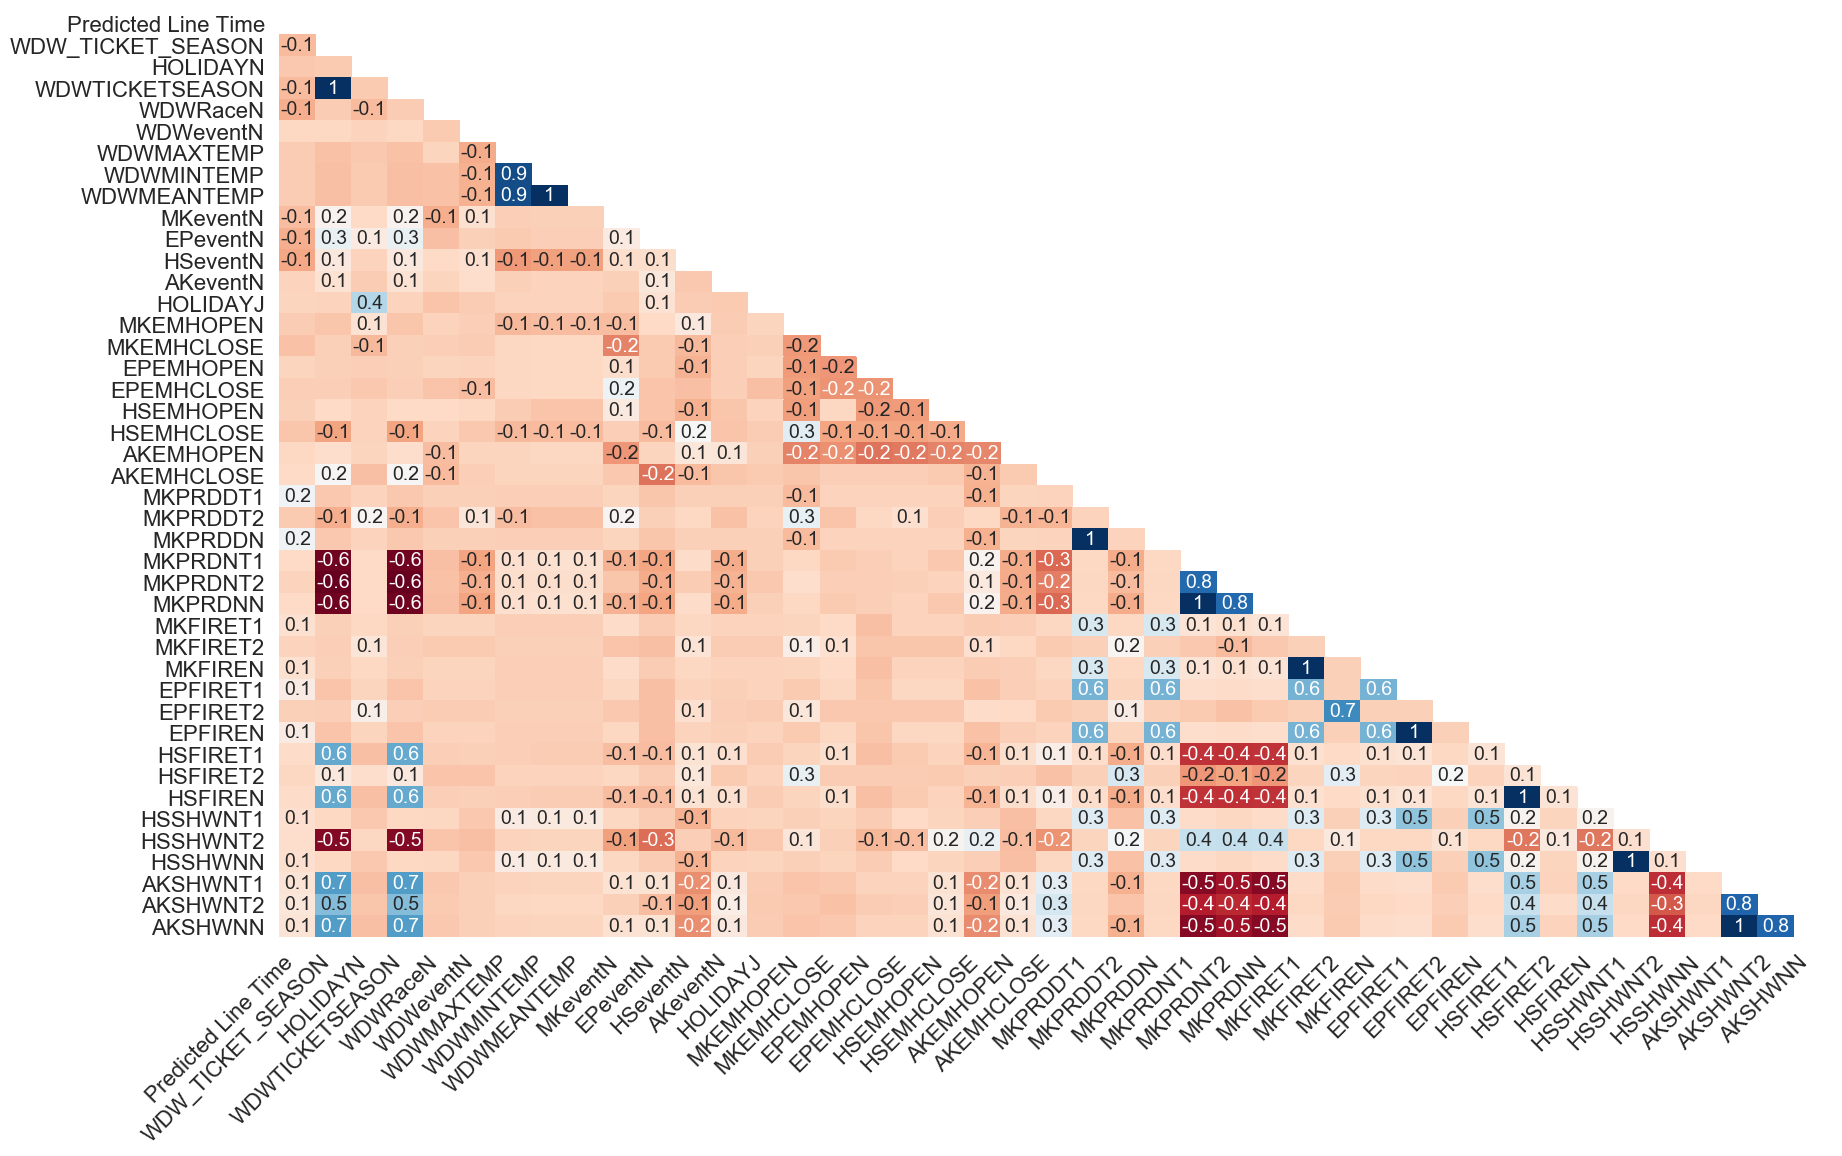

In [141]:
msno.heatmap(cleanpredict)

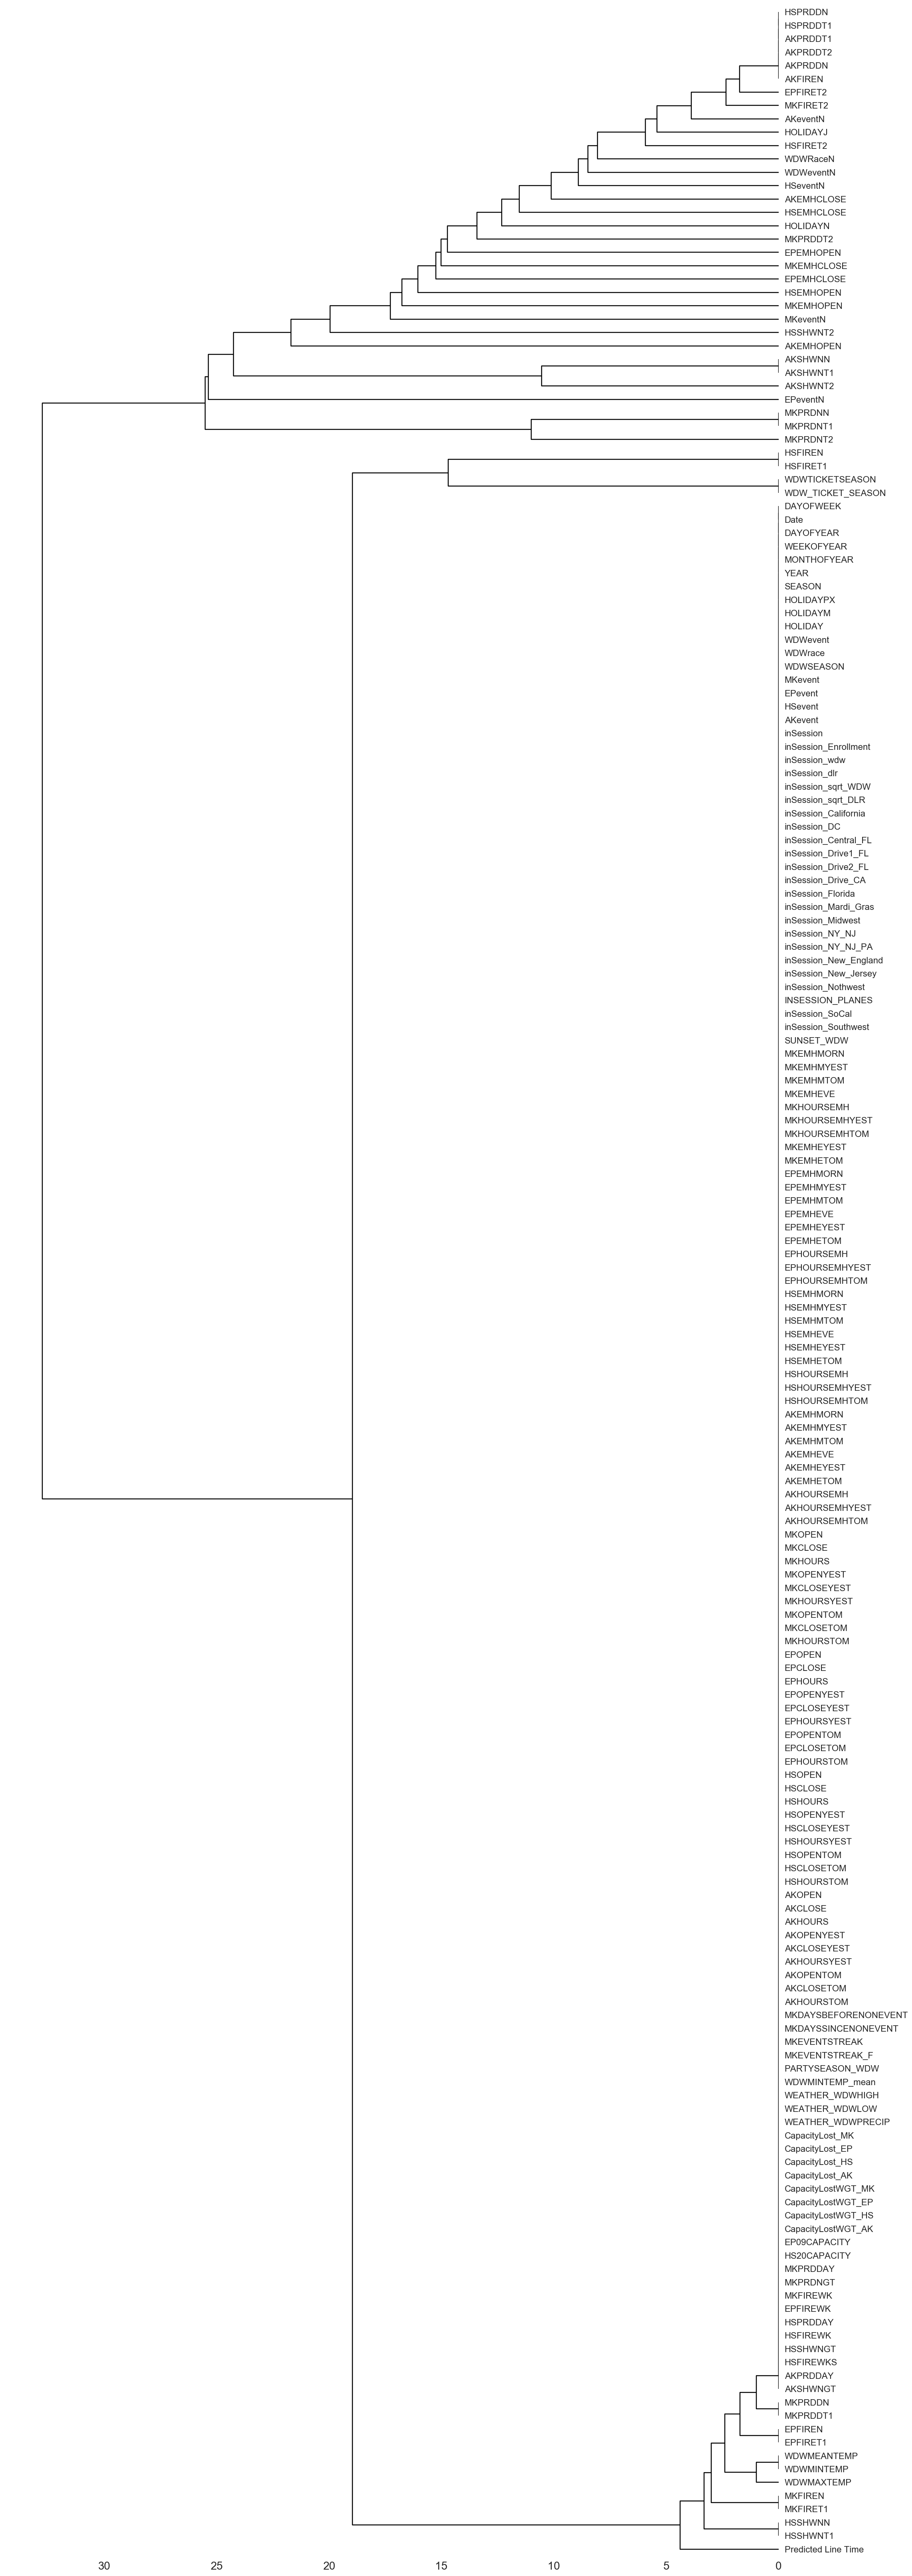

In [142]:
msno.dendrogram(cleanpredict)